In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor


In [2]:
# use this to see all columns in data frame
pd.set_option('display.max_columns', 500)

# seaborn figuresize option
sns.set( rc = {"figure.figsize":(12,8)} )

## DB stuff

In [3]:
cluster = MongoClient("secret_key") 
db = cluster["bina_az"]

# ------------------------Yeni tikili-----------------------------

In [4]:
collection = db["yeni_tikil"]

In [5]:
coll_all_data = collection.find({}) 

In [6]:
raw_yeni_tikili = pd.DataFrame(  coll_all_data  )

In [7]:
raw_yeni_tikili.drop(index=0, inplace = True  )
raw_yeni_tikili.drop(columns=["val"], inplace = True  )

raw_yeni_tikili.reset_index(drop=True, inplace=True)

In [22]:

raw_yeni_tikili["longitude"].value_counts()
        

40.3658715514138    318
40.3831013213814    277
40.3820552370775    235
40.4028431155118    174
40.375124518269     143
                   ... 
40.378191146271       1
40.3907538832264      1
40.4127771930895      1
40.395091942234       1
40.3995172211022      1
Name: longitude, Length: 34613, dtype: int64

In [30]:
raw_yeni_tikili[["latitude","longitude"] ].value_counts().head(20)

latitude          longitude       
49.9586963653564  40.3658715514138    315
49.8719215393066  40.3831013213814    264
49.8884868621826  40.3820552370775    234
49.8706340789795  40.4028431155118    146
49.8150157928467  40.375124518269     143
49.8026561737061  40.3902927112201    119
49.8514938354492  40.4005554557543     77
49.8748397827148  40.3783938140893     76
49.8135566711426  40.4106205771752     72
49.7949314117432  40.3923192369433     72
49.8155200481415  40.3958818520571     72
49.9534606933594  40.3730974751957     67
49.7243785858154  40.4609236054629     64
49.8083639144897  40.3978101614279     64
49.8078060150146  40.4040195959728     56
49.9605846405029  40.3556362251447     54
49.8417091369629  40.4259114520057     54
49.8007464408875  40.4127118421074     53
49.8297786712646  40.3792438050184     47
49.8350143432617  40.3990520941561     46
dtype: int64

### Exploratory analysis

In [11]:
raw_yeni_tikili.head(3)

,_id,url,crawl_date,title,price,price_currency,poster,poster_type,Ünvan,description,Elanın nömrəsi,Yeniləndi,Kateqoriya,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,image_link,seher,Torpaq sahəsi
0,6,https://bina.az/items/1893097,05 Fevral 2021 18:51,"Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.",300000,AZN,Mubariz,vasitəçi (agent),"Bakı şəhəri, Bakıxanov küçəsi",Təcili Satılır...Qaz Kupça var..\nRoseville...,1893097,05 Fevral 2021,Yeni tikili,5 / 17,135 m²,3,var,yoxdur,\nGənclik m.\nRespublika stadionu \nNərimanov ...,40.4004199528234,49.8515541501708,https://bina.azstatic.com/uploads/large/2021%2...,baki,NaN
1,22,https://bina.az/items/1885145,05 Fevral 2021 18:51,"Satılır 3 otaqlı yeni tikili 132.5 m², Nəriman...",153000,AZN,Самир Ахмедов,vasitəçi (agent),"Bakı şəhəri, ул.Табриза 21-23",Срочно.В Наримановском р-не недалеко от 162 шк...,1885145,05 Fevral 2021,Yeni tikili,10 / 16,132.5 m²,3,yoxdur,yoxdur,\nŞərq bazarı \nNərimanov r.\n\n,40.3896626776867,49.853716962315,https://bina.azstatic.com/uploads/large/2021%2...,baki,NaN
2,72,https://bina.az/items/1893207,05 Fevral 2021 18:50,"Satılır 2 otaqlı yeni tikili 115 m², Bayıl q.",171300,AZN,Fikrət,vasitəçi (agent),"Bakı şəhəri, Q.Abbasov küçəsi","Səbail rayonu ,Bayıl qəsəbəsi Q.Abbasov küçəsi...",1893207,05 Fevral 2021,Yeni tikili,7 / 14,115 m²,2,yoxdur,yoxdur,\nSəbail r.\nBayıl q.\n\n,40.3476246665641,49.8366853719971,https://bina.azstatic.com/uploads/large/2021%2...,baki,NaN


In [9]:
raw_yeni_tikili.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30546 entries, 0 to 30545
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             30546 non-null  object
 1   url             30546 non-null  object
 2   crawl_date      30546 non-null  object
 3   title           30546 non-null  object
 4   price           30546 non-null  object
 5   price_currency  30546 non-null  object
 6   poster          30546 non-null  object
 7   poster_type     30546 non-null  object
 8   Ünvan           30546 non-null  object
 9   description     30546 non-null  object
 10  Elanın nömrəsi  30546 non-null  object
 11  Yeniləndi       30546 non-null  object
 12  Kateqoriya      30546 non-null  object
 13  Mərtəbə         30546 non-null  object
 14  Sahə            30546 non-null  object
 15  Otaq sayı       30546 non-null  object
 16  Kupça           30545 non-null  object
 17  İpoteka         30546 non-null  object
 18  locati

In [10]:
# keep last
raw_yeni_tikili.drop_duplicates( subset = ["Elanın nömrəsi","title" ] , inplace = True , ignore_index = True,keep = "last" )   


In [11]:
# make sure that there is no duplicates
elan_nums = raw_yeni_tikili["Elanın nömrəsi"].value_counts()
elan_dup = elan_nums[ elan_nums>1 ].index
#elan_dup
elan_nums.head(15)

 1853849    3
 1907924    2
 1908550    2
 1919635    2
 1900665    2
 914167     2
 1910963    2
 1936901    2
 1921490    2
 1923876    2
 1921731    2
 1933325    2
 1768039    2
 1898811    2
 1905849    2
Name: Elanın nömrəsi, dtype: int64

In [12]:
# I saw that most of equal "Elan Nomresi" are very similar to its duplicate
raw_yeni_tikili[ raw_yeni_tikili["Elanın nömrəsi"].isin( elan_dup ) ]
raw_yeni_tikili.drop_duplicates( subset = ["Elanın nömrəsi" ] , inplace = True , ignore_index = True, keep="last" )         


In [13]:
# check category identity

print(raw_yeni_tikili["Kateqoriya"].value_counts()) 
print()

print( raw_yeni_tikili["price_currency"].value_counts() )
print()


Yeni tikili     30450
Köhnə tikili        2
Name: Kateqoriya, dtype: int64

AZN    30452
Name: price_currency, dtype: int64



In [14]:
raw_yeni_tikili = raw_yeni_tikili[ raw_yeni_tikili["Kateqoriya"] == "Yeni tikili" ]



In [15]:
# check occurrence

print(raw_yeni_tikili["seher"].value_counts())
print()

print(raw_yeni_tikili["Kupça"].value_counts())
print()

print(raw_yeni_tikili["İpoteka"].value_counts())
print()

print(raw_yeni_tikili["poster_type"].value_counts())
print()

print(raw_yeni_tikili["poster"].value_counts().head(15))

baki        29187
xirdalan     1109
sumqayit      154
Name: seher, dtype: int64

var       22166
yoxdur     8284
Name: Kupça, dtype: int64

yoxdur    26458
var        3992
Name: İpoteka, dtype: int64

vasitəçi (agent)    26643
mülkiyyətçi          3807
Name: poster_type, dtype: int64

Ilqar Məmmədov     421
Anar               403
Əli                264
Ceyhun             251
Kamran             237
Orxan              232
Samir              223
Siyavuş Əhmədov    209
Ramil              199
Emin               198
Ramin              195
Nara x.            195
Elanın sahibi      183
İlkin              178
Tərlan             177
Name: poster, dtype: int64


### Cleaning and prepearing data to analysis

In [63]:
columns_to_drop = ["_id","price_currency","Elanın nömrəsi","Kateqoriya",
                   "Ünvan","image_link", # image can be used for DL
                   #"url",
                   "title",#"description", # can be used for NLP
                   "crawl_date","Yeniləndi", # use it in the future for date analysis
                  ]
yeni_tikili_for_stats = raw_yeni_tikili.drop( columns_to_drop , axis=1)

In [64]:
yeni_tikili_for_stats.head(3)

,url,price,poster,poster_type,description,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,seher
0,https://bina.az/items/1893097,300000,Mubariz,vasitəçi (agent),Təcili Satılır...Qaz Kupça var..\nRoseville...,5 / 17,135 m²,3,var,yoxdur,\nGənclik m.\nRespublika stadionu \nNərimanov ...,40.4004199528234,49.8515541501708,baki
1,https://bina.az/items/1784766,128000,Самир Ахмедов,vasitəçi (agent),В интенсивно развивающемся и планово строящемс...,11 / 16,63 m²,2,yoxdur,yoxdur,\nXətai r.\n\n,40.3829610408647,49.8937768449537,baki
2,https://bina.az/items/1885145,153000,Самир Ахмедов,vasitəçi (agent),Срочно.В Наримановском р-не недалеко от 162 шк...,10 / 16,132.5 m²,3,yoxdur,yoxdur,\nŞərq bazarı \nNərimanov r.\n\n,40.3896626776867,49.853716962315,baki


In [65]:
# data types transformation

def location_transform(x):
    out = "|".join(filter(lambda x: x != "", x.split("\n")))
    return out
    
yeni_tikili_for_stats["locations"] = yeni_tikili_for_stats["locations"].apply(  location_transform  )
yeni_tikili_for_stats["Max_Mərtəbə"] = yeni_tikili_for_stats["Mərtəbə"].apply(  lambda x : int( x.split("/")[1] )  )
yeni_tikili_for_stats["Mərtəbə"] = yeni_tikili_for_stats["Mərtəbə"].apply(  lambda x : int( x.split("/")[0] )  )
yeni_tikili_for_stats["Sahə"] = yeni_tikili_for_stats["Sahə"].apply( lambda x : float(x.replace("m²",""))  )

yeni_tikili_for_stats[[ "Otaq sayı","latitude","longitude","price" ]] = yeni_tikili_for_stats[   [ "Otaq sayı","latitude","longitude","price" ]  ].apply( pd.to_numeric ) 





In [66]:
# remove some outliers
to_drop_ind = []
to_drop_ind +=  yeni_tikili_for_stats[ yeni_tikili_for_stats["Sahə"] > 600 ].index.to_list() # >410
to_drop_ind +=  yeni_tikili_for_stats[ yeni_tikili_for_stats["Max_Mərtəbə"] > 40 ].index.to_list()


b_info = yeni_tikili_for_stats["price"].describe()
tresh_val = b_info["75%"] + (6*(b_info["75%"]-b_info["25%"]))  # constant = 5
to_drop_ind += yeni_tikili_for_stats[ yeni_tikili_for_stats["price"] >tresh_val  ].index.to_list() #tresh_val
yeni_tikili_for_stats.drop( to_drop_ind, axis = 0 , inplace=True  )


yeni_tikili_for_stats = yeni_tikili_for_stats[ yeni_tikili_for_stats["price"] > 24999 ]
yeni_tikili_for_stats = yeni_tikili_for_stats[ yeni_tikili_for_stats["Sahə"]  > 20 ]
yeni_tikili_for_stats = yeni_tikili_for_stats[ yeni_tikili_for_stats["Max_Mərtəbə"] > 4 ]

## Otaq and longit
yeni_tikili_for_stats = yeni_tikili_for_stats[ yeni_tikili_for_stats["Otaq sayı"] < 15  ]
yeni_tikili_for_stats = yeni_tikili_for_stats[ (yeni_tikili_for_stats["longitude"] < 41)&(yeni_tikili_for_stats["longitude"] > 40) ]
## ipoteka
yeni_tikili_for_stats = yeni_tikili_for_stats[ yeni_tikili_for_stats["İpoteka"] == "yoxdur" ]

## high price / low sahe
low_sahe = yeni_tikili_for_stats[ (yeni_tikili_for_stats["Sahə"] < 100) & (yeni_tikili_for_stats["price"] > 400000) & ~(yeni_tikili_for_stats["locations"].str.startswith("Port Baku")  ) & ~(yeni_tikili_for_stats["locations"].str.startswith("Ağ şəhər"))   ]
yeni_tikili_for_stats.drop( low_sahe.index.to_list(), axis = 0 , inplace=True  )

high_price = yeni_tikili_for_stats[ (yeni_tikili_for_stats["Sahə"] > 150) & (yeni_tikili_for_stats["price"] < 100000)   ]              
yeni_tikili_for_stats.drop( high_price.index.to_list(), axis = 0 , inplace=True  )



elan_sahibi = [ i for i in yeni_tikili_for_stats["poster"] if i.startswith("Elan") ]
yeni_tikili_for_stats["poster"] = np.where( yeni_tikili_for_stats["poster"].isin(elan_sahibi) , "Elanin Sahibi", yeni_tikili_for_stats["poster"] ) 



In [67]:
yeni_tikili_for_stats = yeni_tikili_for_stats.reset_index(drop=True)  

In [68]:
# transform location column to vector df

def tokenize(text):
    return  [ i for i in text.split("|") ] 


    

temp_df = yeni_tikili_for_stats["locations"].to_list()

location_vectorizer = CountVectorizer( tokenizer=tokenize )
vectorizer_array = location_vectorizer.fit_transform( temp_df ).toarray()
vocab = location_vectorizer.get_feature_names()
location_vectorizer.vocabulary = vocab


# remove some unnecesarry records
locations_df = pd.DataFrame(  vectorizer_array  ,columns = vocab )
locatios_count_tail = locations_df.sum().sort_values(ascending=False)
indexes_to_drop = locatios_count_tail[ locatios_count_tail  < 20 ].index
locations_df.drop( columns=indexes_to_drop , axis = 1, inplace = True)

location_vectorizer.ind_to_drop = indexes_to_drop
#location_vectorizer.stop_words_ = list(indexes_to_drop)
#location_vectorizer.vocabulary = locations_df.columns


In [69]:
print( yeni_tikili_for_stats.shape )
yeni_tikili_for_stats.head(3)

(25984, 15)


,url,price,poster,poster_type,description,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,seher,Max_Mərtəbə
0,https://bina.az/items/1893097,300000,Mubariz,vasitəçi (agent),Təcili Satılır...Qaz Kupça var..\nRoseville...,5,135.0,3,var,yoxdur,Gənclik m.|Respublika stadionu |Nərimanov r.,40.400420,49.851554,baki,17
1,https://bina.az/items/1784766,128000,Самир Ахмедов,vasitəçi (agent),В интенсивно развивающемся и планово строящемс...,11,63.0,2,yoxdur,yoxdur,Xətai r.,40.382961,49.893777,baki,16
2,https://bina.az/items/1885145,153000,Самир Ахмедов,vasitəçi (agent),Срочно.В Наримановском р-не недалеко от 162 шк...,10,132.5,3,yoxdur,yoxdur,Şərq bazarı |Nərimanov r.,40.389663,49.853717,baki,16


In [70]:
print( locations_df.shape )
locations_df.head(3)

(25984, 125)


,1-ci mikrorayon q.,2-ci mikrorayon q.,20 yanvar m.,28 may m.,3-cü mikrorayon q.,4-cü mikrorayon q.,5-ci mikrorayon q.,6-cı mikrorayon q.,7-ci mikrorayon q.,8-ci kilometr q.,8-ci mikrorayon q.,9-cu mikrorayon q.,abşeron r.,avtovağzal m.,axundov bağı,ayna sultanova heykəli,azadlıq meydanı,azadlıq prospekti m.,azərbaycan dillər universiteti,azərbaycan kinoteatrı,azərbaycan turizm institutu,ağ şəhər,badamdar q.,bakmil m.,bakı asiya universiteti,bakı dövlət universiteti,bakı musiqi akademiyası,bakı slavyan universiteti,bakıxanov q.,bayıl q.,beşmərtəbə,biləcəri q.,binəqədi q.,binəqədi r.,botanika bağı,böyükşor q.,cavanşir körpüsü,dostluq kinoteatrı,dövlət i̇darəçilik akademiyası,dövlət statistika komitəsi,dərnəgül m.,elmlər akademiyası m.,fontanlar bağı,gənclik m.,hüseyn cavid parkı,həzi aslanov m.,həzi aslanov q.,i̇dman kompleksi,i̇ncəsənət və mədəniyyət un.,i̇nşaatçılar m.,i̇qsadiyyat universiteti,i̇zmir parkı,i̇çəri şəhər m.,koala parkı,kubinka q.,köhnə günəşli q.,m.hüseynzadə parkı,m.ə.rəsulzadə q.,m.ə.sabir parkı,malokan bağı,masazır q.,memar əcəmi m.,memarlıq və i̇nşaat universiteti,milli konservatoriya,montin bazarı,mərkəzi univermaq,neapol dairəsi,neft akademiyası,neftçi bazası,neftçilər m.,nizami kinoteatrı,nizami m.,nizami r.,nəriman nərimanov m.,nəriman nərimanov parkı,nərimanov heykəli,nərimanov r.,nəsimi bazarı,nəsimi m.,nəsimi r.,park zorge,pedaqoji universiteti,port baku,prezident parkı,qara qarayev m.,qaradağ r.,qaraçuxur q.,qubernator parkı,qış parkı,respublika stadionu,rusiya səfirliyi,rəssamlıq akademiyası,sabunçu r.,sahil bağı,sahil m.,sevil qazıyeva parkı,sirk,sovetski,space tv,sumqayıt,suraxanı r.,səbail r.,səməd vurğun parkı,texniki universiteti,tibb universiteti,tqdk,təhsil nazirliyi,ukrayna dairəsi,xalqlar dostluğu m.,xalça muzeyi,xırdalan,xətai r.,yasamal bazarı,yasamal q.,yasamal r.,yeni günəşli q.,yeni yasamal q.,zabitlər parkı,zoopark,zərifə əliyeva adına park,şah i̇smayıl xətai m.,şəlalə parkı,şərq bazarı,əhmədli m.,əhmədli q.
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:

locations_df.sum().sort_values(ascending=False)

yasamal r.                6404
nəsimi r.                 5227
xətai r.                  4849
nərimanov r.              3691
şah i̇smayıl xətai m.     1855
                          ... 
m.ə.rəsulzadə q.            28
bakmil m.                   27
azərbaycan kinoteatrı       25
dərnəgül m.                 24
binəqədi q.                 22
Length: 125, dtype: int64

In [72]:
yeni_tikili_for_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          25984 non-null  object 
 1   price        25984 non-null  int64  
 2   poster       25984 non-null  object 
 3   poster_type  25984 non-null  object 
 4   description  25984 non-null  object 
 5   Mərtəbə      25984 non-null  int64  
 6   Sahə         25984 non-null  float64
 7   Otaq sayı    25984 non-null  int64  
 8   Kupça        25984 non-null  object 
 9   İpoteka      25984 non-null  object 
 10  locations    25984 non-null  object 
 11  longitude    25984 non-null  float64
 12  latitude     25984 non-null  float64
 13  seher        25984 non-null  object 
 14  Max_Mərtəbə  25984 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 3.0+ MB


### Data visualization

In [26]:
yeni_tikili_for_stats.describe( include = "all" ).apply(lambda s: s.apply(lambda x: x if (type(x)==str) else format( round(x,3), 'f') ) )   

,url,price,poster,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,seher,Max_Mərtəbə
count,25984.0,25984.000,25984.0,25984.0,25984.000,25984.000,25984.000,25984.0,25984.0,25984.0,25984.000,25984.000,25984.0,25984.000
unique,25984.0,nan,2214.0,2.0,nan,nan,nan,2.0,1.0,1273.0,nan,nan,3.0,nan
top,https://bina.az/items/1946899,nan,Ilqar Məmmədov,vasitəçi (agent),nan,nan,nan,var,yoxdur,Şah İsmayıl Xətai m.|Xətai r.,nan,nan,baki,nan
freq,1.0,nan,418.0,22867.0,nan,nan,nan,17904.0,25984.0,1622.0,nan,nan,24938.0,nan
mean,nan,191272.243,nan,nan,9.206,115.967,2.785,nan,nan,nan,40.397,49.847,nan,16.116
std,nan,128281.006,nan,nan,4.679,51.541,0.872,nan,nan,nan,0.028,0.057,nan,3.765
min,nan,25000.000,nan,nan,1.000,25.000,1.000,nan,nan,nan,40.080,49.415,nan,5.000
25%,nan,107000.000,nan,nan,5.000,77.000,2.000,nan,nan,nan,40.382,49.811,nan,15.000
50%,nan,155000.000,nan,nan,9.000,109.000,3.000,nan,nan,nan,40.393,49.838,nan,17.000
75%,nan,240000.000,nan,nan,12.000,141.000,3.000,nan,nan,nan,40.404,49.872,nan,18.000


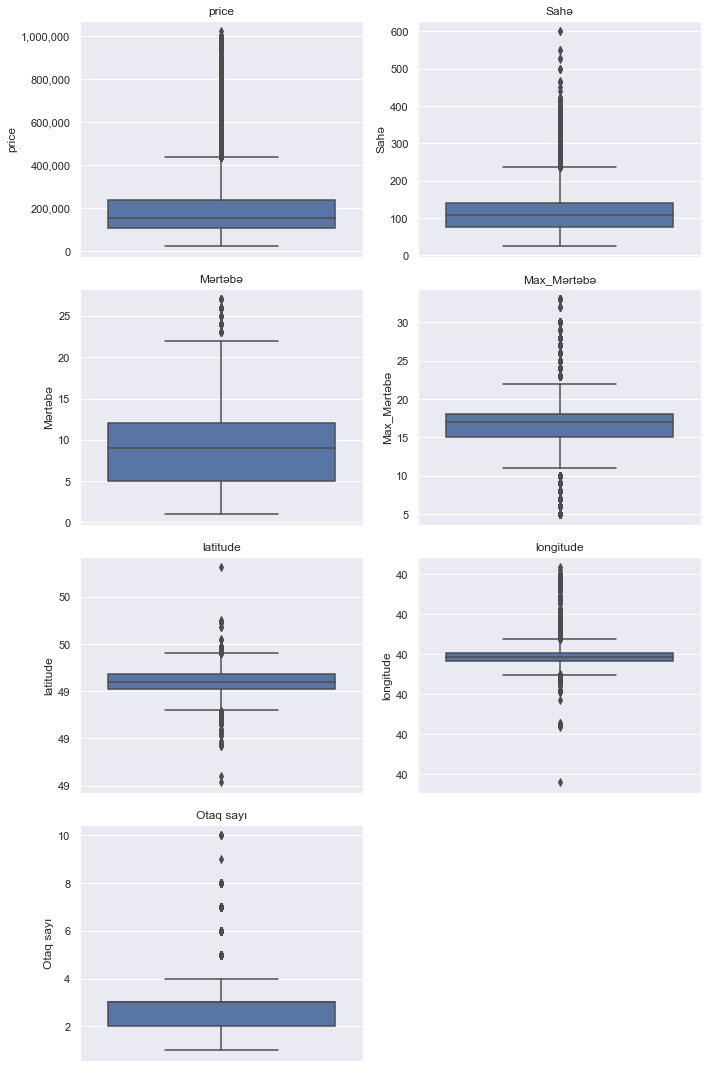

In [27]:
# boxplots

box_list = ["price","Sahə","Mərtəbə","Max_Mərtəbə","latitude","longitude","Otaq sayı" ]
ncols = 2
nrows=  round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (10,15) )


for i in range(nrows):
    for j in range(ncols):
        
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        
        
        sns.boxplot( y = box_list[ ncols*i + j ]  , data = yeni_tikili_for_stats , ax = ax[i,j] )
        ax[i,j].ticklabel_format( useOffset=False ,style='plain', axis = "y" )
        ax[i,j].set_title( box_list[ ncols*i + j ] )
        
        
        ax[i,j].get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
        )


fig.tight_layout()
plt.show()

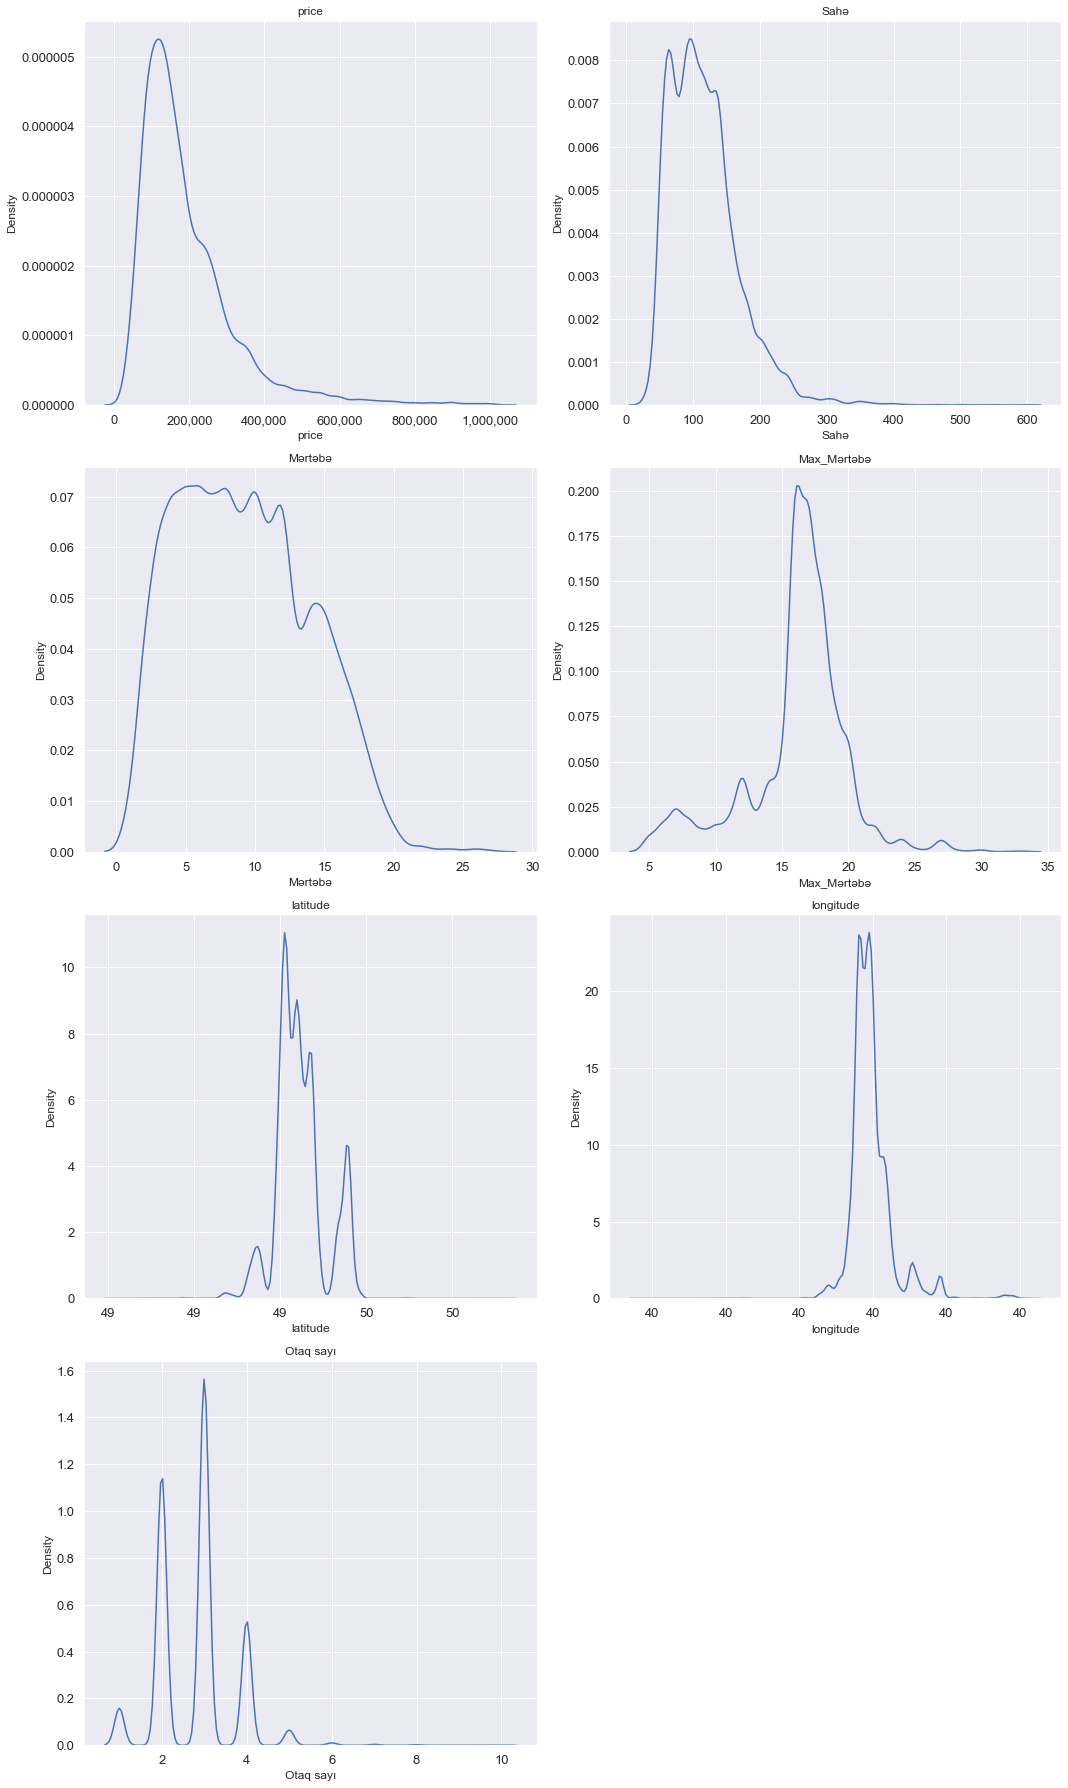

In [28]:
# histograms


box_list = ["price","Sahə","Mərtəbə","Max_Mərtəbə","latitude","longitude","Otaq sayı" ]

ncols = 2
nrows= round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (15,25) )


for i in range(nrows):
    for j in range(ncols):
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        
        #sns.histplot( (yeni_tikili_for_stats[  box_list[ ncols*i + j ] ]) , kde = False, ax = ax[i,j] )
        sns.kdeplot( (yeni_tikili_for_stats[  box_list[ ncols*i + j ] ]) , ax = ax[i,j]  )
        #sns.displot(  (yeni_tikili_for_stats[  box_list[ ncols*i + j ] ])  , kde=False, ax = ax[i,j], fit=st.johnsonsu)  
        
        ax[i,j].ticklabel_format( useOffset=False ,style='plain', axis = "both" )
        ax[i,j].set_title( box_list[ ncols*i + j ] )
        ax[i,j].get_xaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
        )
        ax[i,j].tick_params( axis='both', which='major', labelsize= 13 )
        
        
        

fig.tight_layout()
plt.show()

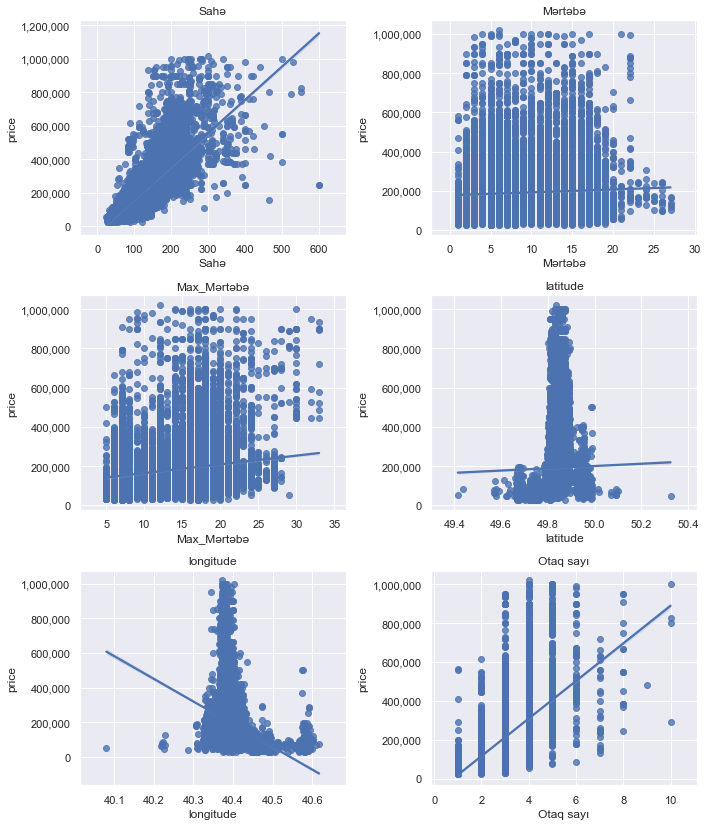

In [29]:
# scatterplot

box_list = ["Sahə","Mərtəbə","Max_Mərtəbə","latitude","longitude","Otaq sayı" ]

ncols = 2
nrows= round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (10,15) )


for i in range(nrows):
    for j in range(ncols):
        
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        
        d_min = yeni_tikili_for_stats[ box_list[ ncols*i + j ] ].min()
        d_max = yeni_tikili_for_stats[ box_list[ ncols*i + j ] ].max()
        d_rng = d_max - d_min
        
        sns.regplot( x= box_list[ ncols*i + j ]  , y = "price",data = yeni_tikili_for_stats , ax = ax[i,j] )         
        ax[i,j].ticklabel_format( useOffset=False ,style='plain', axis = "both" )
        ax[i,j].set_title( box_list[ ncols*i + j ] )
        ax[i,j].set_xlim(  d_min-( d_rng/8 )   , d_max+( d_rng/8 )   )  
        
        ax[i,j].get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
        )

#fig.set_size_inches(15,12)
fig.tight_layout()
plt.show()

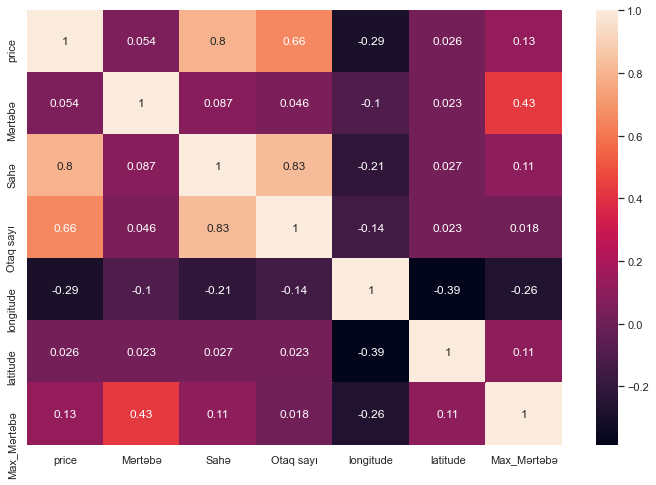

In [30]:
# correlation in df
sns.heatmap( yeni_tikili_for_stats.corr() , annot=True)
plt.show()

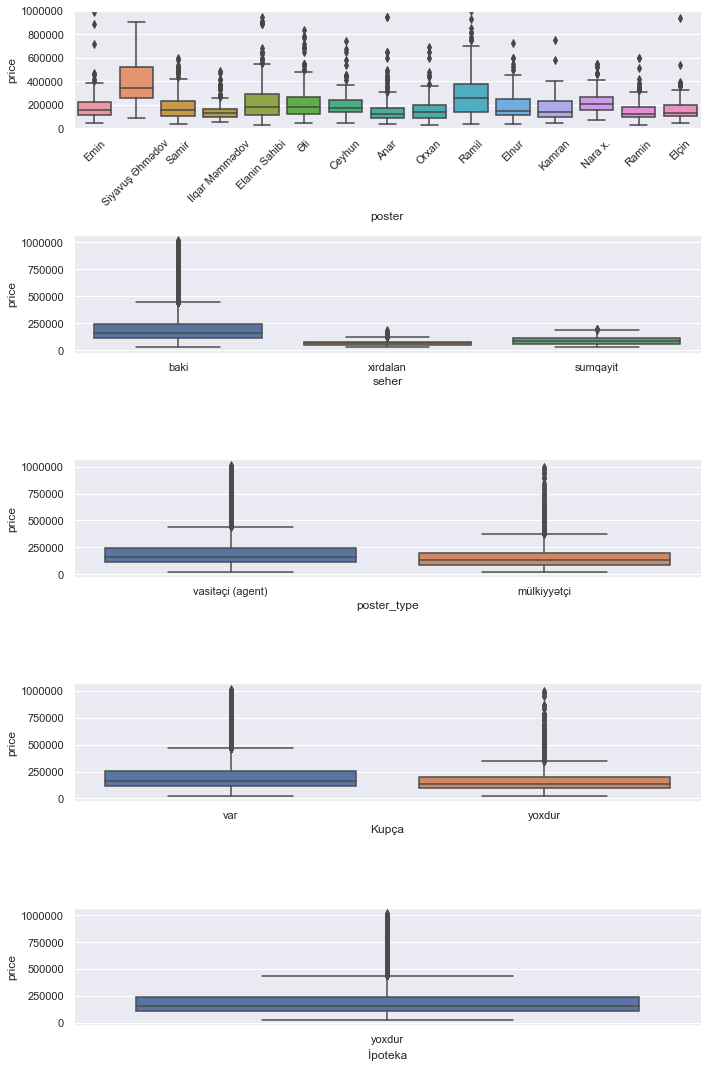

In [31]:
box_list = ["poster","seher","poster_type","Kupça","İpoteka"  ]

fig,ax = plt.subplots( nrows = len(box_list) , figsize = (10,15) )



top_posters = yeni_tikili_for_stats["poster"].value_counts().head(15).index
sns.boxplot( y = "price", x = "poster" , data = yeni_tikili_for_stats[ yeni_tikili_for_stats["poster"].isin(top_posters)  ], ax= ax[0]  )   
ax[0].ticklabel_format( useOffset=False ,style='plain', axis = "y" )
ax[0].set_ylim(0,1000000)
#ax[0].set_xticklabels(  ax[0].get_xticklabels() , rotation = 45)
ax[0].tick_params(axis='x', labelrotation = 45)

for i in range(len(box_list))[1:]:
    sns.boxplot( y = "price", x = box_list[i] , data = yeni_tikili_for_stats, ax = ax[i]  )
    ax[i].ticklabel_format( useOffset=False ,style='plain', axis = "y" )
    #ax[i].set_ylim(0,600000)


fig.tight_layout()
plt.show()

In [41]:
print(yeni_tikili_for_stats.shape)
yeni_tikili_for_stats.head()


(22007, 14)


,url,price,poster,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,seher,Max_Mərtəbə
0,https://bina.az/items/1893097,300000,Mubariz,vasitəçi (agent),5,135.0,3,var,yoxdur,Gənclik m.|Respublika stadionu |Nərimanov r.,40.400420,49.851554,baki,17
1,https://bina.az/items/1784766,128000,Самир Ахмедов,vasitəçi (agent),11,63.0,2,yoxdur,yoxdur,Xətai r.,40.382961,49.893777,baki,16
2,https://bina.az/items/1885145,153000,Самир Ахмедов,vasitəçi (agent),10,132.5,3,yoxdur,yoxdur,Şərq bazarı |Nərimanov r.,40.389663,49.853717,baki,16
3,https://bina.az/items/1893207,171300,Fikrət,vasitəçi (agent),7,115.0,2,yoxdur,yoxdur,Səbail r.|Bayıl q.,40.347625,49.836685,baki,14
4,https://bina.az/items/1893213,44500,QASIM,vasitəçi (agent),4,43.0,2,var,yoxdur,Abşeron r.|Masazır q.,40.492294,49.747231,baki,8


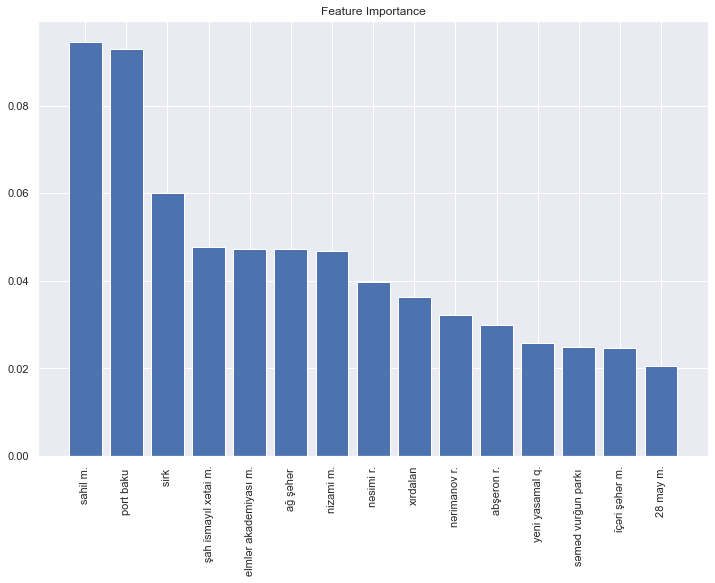

In [32]:
# feature importance in locations_df

X , y = locations_df , yeni_tikili_for_stats["price"]

model = RandomForestRegressor()

model.fit(X, y)

importance = model.feature_importances_

ziped_val =  dict(zip(locations_df.columns,importance))

ziped_val = dict(sorted(ziped_val.items(), key=lambda x: x[1], reverse = True) )



plt.bar( list(ziped_val.keys())[:15] , list(ziped_val.values())[:15]   )
plt.xticks(rotation=90)
plt.title( "Feature Importance" )
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='price', ylabel='Density'>

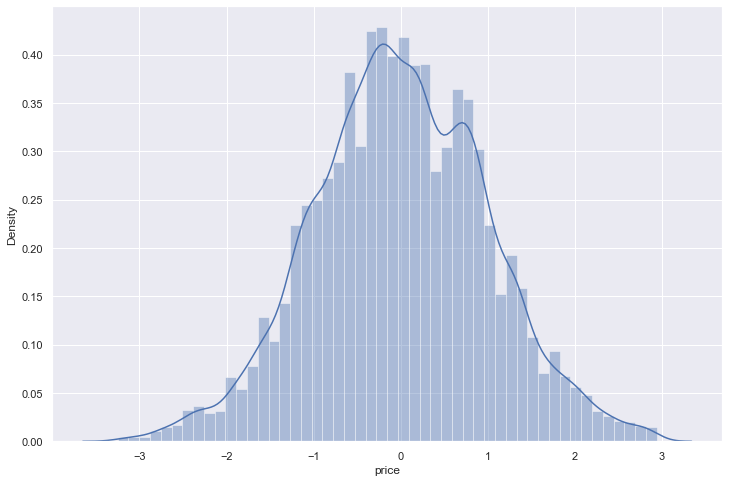

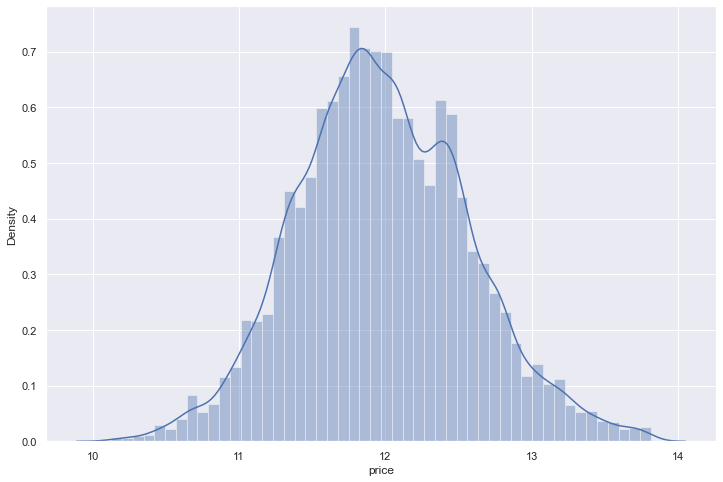

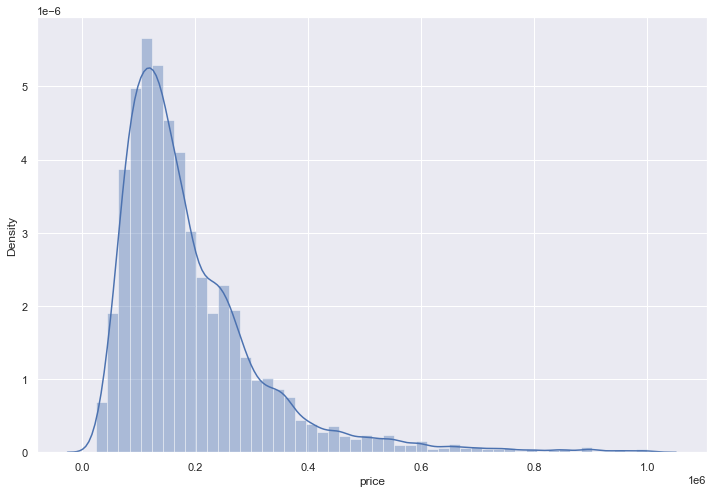

In [32]:
def johnson(y):
    gamma, eta, epsilon, lbda = st.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon


yt, g, et, ep, l = johnson(yeni_tikili_for_stats[ "price" ])
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot( np.log1p( yeni_tikili_for_stats[ "price" ] ) )
plt.figure(3)
sns.distplot(yt2)


## Train model



In [32]:
print(yeni_tikili_for_stats.shape)
yeni_tikili_for_stats

(25984, 14)


,url,price,poster,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,seher,Max_Mərtəbə
0,https://bina.az/items/1893097,300000,Mubariz,vasitəçi (agent),5,135.0,3,var,yoxdur,Gənclik m.|Respublika stadionu |Nərimanov r.,40.400420,49.851554,baki,17
1,https://bina.az/items/1784766,128000,Самир Ахмедов,vasitəçi (agent),11,63.0,2,yoxdur,yoxdur,Xətai r.,40.382961,49.893777,baki,16
2,https://bina.az/items/1885145,153000,Самир Ахмедов,vasitəçi (agent),10,132.5,3,yoxdur,yoxdur,Şərq bazarı |Nərimanov r.,40.389663,49.853717,baki,16
3,https://bina.az/items/1893207,171300,Fikrət,vasitəçi (agent),7,115.0,2,yoxdur,yoxdur,Səbail r.|Bayıl q.,40.347625,49.836685,baki,14
4,https://bina.az/items/1893213,44500,QASIM,vasitəçi (agent),4,43.0,2,var,yoxdur,Abşeron r.|Masazır q.,40.492294,49.747231,baki,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25979,https://bina.az/items/1947273,150000,Ilqar Məmmədov,vasitəçi (agent),2,116.0,3,var,yoxdur,Əhmədli m.|Xətai r.|Əhmədli q.,40.384718,49.954617,baki,16
25980,https://bina.az/items/1939621,250000,Cəlal Əliyev,vasitəçi (agent),14,165.0,3,var,yoxdur,Azərbaycan Dillər Universiteti |Bakı Slavyan U...,40.384369,49.842129,baki,16
25981,https://bina.az/items/1947275,83000,Ilqar Məmmədov,vasitəçi (agent),8,52.0,2,yoxdur,yoxdur,Xətai r.|Həzi Aslanov q.,40.367445,49.960127,baki,19
25982,https://bina.az/items/1947274,180000,Ilqar Məmmədov,vasitəçi (agent),18,158.0,3,var,yoxdur,Əhmədli m.|Xətai r.|Əhmədli q.,40.384130,49.955218,baki,19


In [33]:
locations_df

,1-ci mikrorayon q.,2-ci mikrorayon q.,20 yanvar m.,28 may m.,3-cü mikrorayon q.,4-cü mikrorayon q.,5-ci mikrorayon q.,6-cı mikrorayon q.,7-ci mikrorayon q.,8-ci kilometr q.,8-ci mikrorayon q.,9-cu mikrorayon q.,abşeron r.,avtovağzal m.,axundov bağı,ayna sultanova heykəli,azadlıq meydanı,azadlıq prospekti m.,azərbaycan dillər universiteti,azərbaycan kinoteatrı,azərbaycan turizm institutu,ağ şəhər,badamdar q.,bakmil m.,bakı asiya universiteti,bakı dövlət universiteti,bakı musiqi akademiyası,bakı slavyan universiteti,bakıxanov q.,bayıl q.,beşmərtəbə,biləcəri q.,binəqədi q.,binəqədi r.,botanika bağı,böyükşor q.,cavanşir körpüsü,dostluq kinoteatrı,dövlət i̇darəçilik akademiyası,dövlət statistika komitəsi,dərnəgül m.,elmlər akademiyası m.,fontanlar bağı,gənclik m.,hüseyn cavid parkı,həzi aslanov m.,həzi aslanov q.,i̇dman kompleksi,i̇ncəsənət və mədəniyyət un.,i̇nşaatçılar m.,i̇qsadiyyat universiteti,i̇zmir parkı,i̇çəri şəhər m.,koala parkı,kubinka q.,köhnə günəşli q.,m.hüseynzadə parkı,m.ə.rəsulzadə q.,m.ə.sabir parkı,malokan bağı,masazır q.,memar əcəmi m.,memarlıq və i̇nşaat universiteti,milli konservatoriya,montin bazarı,mərkəzi univermaq,neapol dairəsi,neft akademiyası,neftçi bazası,neftçilər m.,nizami kinoteatrı,nizami m.,nizami r.,nəriman nərimanov m.,nəriman nərimanov parkı,nərimanov heykəli,nərimanov r.,nəsimi bazarı,nəsimi m.,nəsimi r.,park zorge,pedaqoji universiteti,port baku,prezident parkı,qara qarayev m.,qaradağ r.,qaraçuxur q.,qubernator parkı,qış parkı,respublika stadionu,rusiya səfirliyi,rəssamlıq akademiyası,sabunçu r.,sahil bağı,sahil m.,sevil qazıyeva parkı,sirk,sovetski,space tv,sumqayıt,suraxanı r.,səbail r.,səməd vurğun parkı,texniki universiteti,tibb universiteti,tqdk,təhsil nazirliyi,ukrayna dairəsi,xalqlar dostluğu m.,xalça muzeyi,xırdalan,xətai r.,yasamal bazarı,yasamal q.,yasamal r.,yeni günəşli q.,yeni yasamal q.,zabitlər parkı,zoopark,zərifə əliyeva adına park,şah i̇smayıl xətai m.,şəlalə parkı,şərq bazarı,əhmədli m.,əhmədli q.
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [85]:
concated_df = pd.concat( [ yeni_tikili_for_stats, locations_df, pd.get_dummies(yeni_tikili_for_stats["seher"],drop_first=True ), kompleks ] , axis= 1  )#.drop( columns=["index"] )


concated_df

,url,price,poster,poster_type,description,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,longitude,latitude,seher,Max_Mərtəbə,1-ci mikrorayon q.,2-ci mikrorayon q.,20 yanvar m.,28 may m.,3-cü mikrorayon q.,4-cü mikrorayon q.,5-ci mikrorayon q.,6-cı mikrorayon q.,7-ci mikrorayon q.,8-ci kilometr q.,8-ci mikrorayon q.,9-cu mikrorayon q.,abşeron r.,avtovağzal m.,axundov bağı,ayna sultanova heykəli,azadlıq meydanı,azadlıq prospekti m.,azərbaycan dillər universiteti,azərbaycan kinoteatrı,azərbaycan turizm institutu,ağ şəhər,badamdar q.,bakmil m.,bakı asiya universiteti,bakı dövlət universiteti,bakı musiqi akademiyası,bakı slavyan universiteti,bakıxanov q.,bayıl q.,beşmərtəbə,biləcəri q.,binəqədi q.,binəqədi r.,botanika bağı,böyükşor q.,cavanşir körpüsü,dostluq kinoteatrı,dövlət i̇darəçilik akademiyası,dövlət statistika komitəsi,dərnəgül m.,elmlər akademiyası m.,fontanlar bağı,gənclik m.,hüseyn cavid parkı,həzi aslanov m.,həzi aslanov q.,i̇dman kompleksi,i̇ncəsənət və mədəniyyət un.,i̇nşaatçılar m.,i̇qsadiyyat universiteti,i̇zmir parkı,i̇çəri şəhər m.,koala parkı,kubinka q.,köhnə günəşli q.,m.hüseynzadə parkı,m.ə.rəsulzadə q.,m.ə.sabir parkı,malokan bağı,masazır q.,memar əcəmi m.,memarlıq və i̇nşaat universiteti,milli konservatoriya,montin bazarı,mərkəzi univermaq,neapol dairəsi,neft akademiyası,neftçi bazası,neftçilər m.,nizami kinoteatrı,nizami m.,nizami r.,nəriman nərimanov m.,nəriman nərimanov parkı,nərimanov heykəli,nərimanov r.,nəsimi bazarı,nəsimi m.,nəsimi r.,park zorge,pedaqoji universiteti,port baku,prezident parkı,qara qarayev m.,qaradağ r.,qaraçuxur q.,qubernator parkı,qış parkı,respublika stadionu,rusiya səfirliyi,rəssamlıq akademiyası,sabunçu r.,sahil bağı,sahil m.,sevil qazıyeva parkı,sirk,sovetski,space tv,sumqayıt,suraxanı r.,səbail r.,səməd vurğun parkı,texniki universiteti,tibb universiteti,tqdk,təhsil nazirliyi,ukrayna dairəsi,xalqlar dostluğu m.,xalça muzeyi,xırdalan,xətai r.,yasamal bazarı,yasamal q.,yasamal r.,yeni günəşli q.,yeni yasamal q.,zabitlər parkı,zoopark,zərifə əliyeva adına park,şah i̇smayıl xətai m.,şəlalə parkı,şərq bazarı,əhmədli m.,əhmədli q.,sumqayit,xirdalan,is_kompleks
0,https://bina.az/items/1893097,300000,Mubariz,vasitəçi (agent),Təcili Satılır...Qaz Kupça var..\nRoseville...,5,135.0,3,var,yoxdur,Gənclik m.|Respublika stadionu |Nərimanov r.,40.400420,49.851554,baki,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,https://bina.az/items/1784766,128000,Самир Ахмедов,vasitəçi (agent),В интенсивно развивающемся и планово строящемс...,11,63.0,2,yoxdur,yoxdur,Xətai r.,40.382961,49.893777,baki,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,https://bina.az/items/1885145,153000,Самир Ахмедов,vasitəçi (agent),Срочно.В Наримановском р-не недалеко от 162 шк...,10,132.5,3,yoxdur,yoxdur,Şərq bazarı |Nərimanov r.,40.389663,49.853717,baki,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,https://bina.az/items/1893207,171300,Fikrət,vasitəçi (agent),"Səbail rayonu ,Bayıl qəsəbəsi Q.Abbasov küçəsi...",7,115.0,2,yoxdur,yoxdur,Səbail r.|Bayıl q.,40.347625,49.836685,baki,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://bina.az/items/1893213,44500,QASIM,vasitəçi (agent),"Ma

In [91]:
X  =  concated_df.drop( columns = [ "poster","locations","price","İpoteka","url", "seher","description" ]  ) 
y = concated_df["price"]

X["poster_type"] = np.where( concated_df["poster_type"] == "vasitəçi (agent)", 1,0  )
X["Kupça"] = np.where( concated_df["Kupça"] == "var", 1,0  )
#X["İpoteka"] = np.where( yeni_tikili_for_stats["İpoteka"] == "var", 1,0  )



#y = np.log1p( y )   # use when not apply tree


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
X_train.shape,X_test.shape

((18188, 136), (7796, 136))

In [93]:
#johnson_inverse(y_test.head(), g, et, ep, l)
( y_test.head() )

6919     300000
13410    220000
2029     125000
8270     157000
18632    730000
Name: price, dtype: int64

In [94]:
X

,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,longitude,latitude,Max_Mərtəbə,1-ci mikrorayon q.,2-ci mikrorayon q.,20 yanvar m.,28 may m.,3-cü mikrorayon q.,4-cü mikrorayon q.,5-ci mikrorayon q.,6-cı mikrorayon q.,7-ci mikrorayon q.,8-ci kilometr q.,8-ci mikrorayon q.,9-cu mikrorayon q.,abşeron r.,avtovağzal m.,axundov bağı,ayna sultanova heykəli,azadlıq meydanı,azadlıq prospekti m.,azərbaycan dillər universiteti,azərbaycan kinoteatrı,azərbaycan turizm institutu,ağ şəhər,badamdar q.,bakmil m.,bakı asiya universiteti,bakı dövlət universiteti,bakı musiqi akademiyası,bakı slavyan universiteti,bakıxanov q.,bayıl q.,beşmərtəbə,biləcəri q.,binəqədi q.,binəqədi r.,botanika bağı,böyükşor q.,cavanşir körpüsü,dostluq kinoteatrı,dövlət i̇darəçilik akademiyası,dövlət statistika komitəsi,dərnəgül m.,elmlər akademiyası m.,fontanlar bağı,gənclik m.,hüseyn cavid parkı,həzi aslanov m.,həzi aslanov q.,i̇dman kompleksi,i̇ncəsənət və mədəniyyət un.,i̇nşaatçılar m.,i̇qsadiyyat universiteti,i̇zmir parkı,i̇çəri şəhər m.,koala parkı,kubinka q.,köhnə günəşli q.,m.hüseynzadə parkı,m.ə.rəsulzadə q.,m.ə.sabir parkı,malokan bağı,masazır q.,memar əcəmi m.,memarlıq və i̇nşaat universiteti,milli konservatoriya,montin bazarı,mərkəzi univermaq,neapol dairəsi,neft akademiyası,neftçi bazası,neftçilər m.,nizami kinoteatrı,nizami m.,nizami r.,nəriman nərimanov m.,nəriman nərimanov parkı,nərimanov heykəli,nərimanov r.,nəsimi bazarı,nəsimi m.,nəsimi r.,park zorge,pedaqoji universiteti,port baku,prezident parkı,qara qarayev m.,qaradağ r.,qaraçuxur q.,qubernator parkı,qış parkı,respublika stadionu,rusiya səfirliyi,rəssamlıq akademiyası,sabunçu r.,sahil bağı,sahil m.,sevil qazıyeva parkı,sirk,sovetski,space tv,sumqayıt,suraxanı r.,səbail r.,səməd vurğun parkı,texniki universiteti,tibb universiteti,tqdk,təhsil nazirliyi,ukrayna dairəsi,xalqlar dostluğu m.,xalça muzeyi,xırdalan,xətai r.,yasamal bazarı,yasamal q.,yasamal r.,yeni günəşli q.,yeni yasamal q.,zabitlər parkı,zoopark,zərifə əliyeva adına park,şah i̇smayıl xətai m.,şəlalə parkı,şərq bazarı,əhmədli m.,əhmədli q.,sumqayit,xirdalan,is_kompleks
0,1,5,135.0,3,1,40.400420,49.851554,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,11,63.0,2,0,40.382961,49.893777,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,10,132.5,3,0,40.389663,49.853717,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,7,115.0,2,0,40.347625,49.836685,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,43.0,2,1,40.492294,49.747231,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Random Forest Regressor

In [95]:
rand_forest = RandomForestRegressor( n_estimators= 70 , max_depth=15 , n_jobs=5 )
rand_forest.fit(X_train, y_train)
rand_forest.score( X_test , y_test )

0.8867479537316136

In [96]:
(rand_forest.predict( X_test.iloc[:10].values )).round(-3)

array([290000., 212000., 108000., 165000., 714000., 110000., 335000.,
       152000., 115000., 457000.])

In [97]:
( y_test.iloc[:10].values )

array([300000, 220000, 125000, 157000, 730000,  60000, 355000, 144000,
       134000, 595000], dtype=int64)

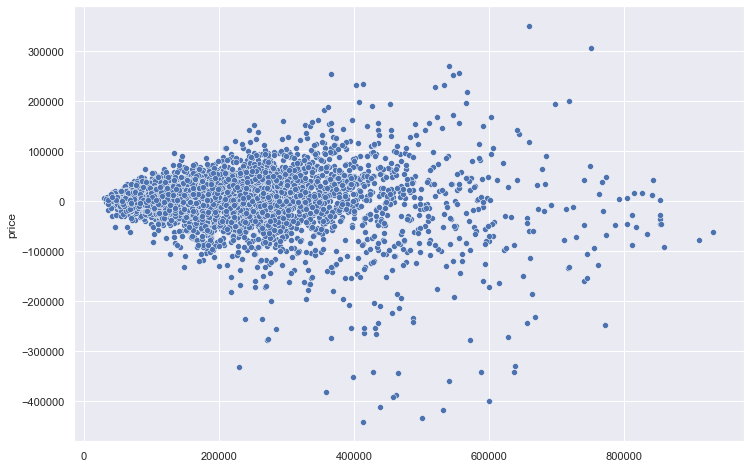

In [98]:
x_pred = ( rand_forest.predict( X_test ) ).round()
y_pred = ( y_test )

residual = x_pred - y_pred

sns.scatterplot(  x = x_pred  , y= residual  )  

plt.ticklabel_format( useOffset=False ,style='plain', axis = "both" )

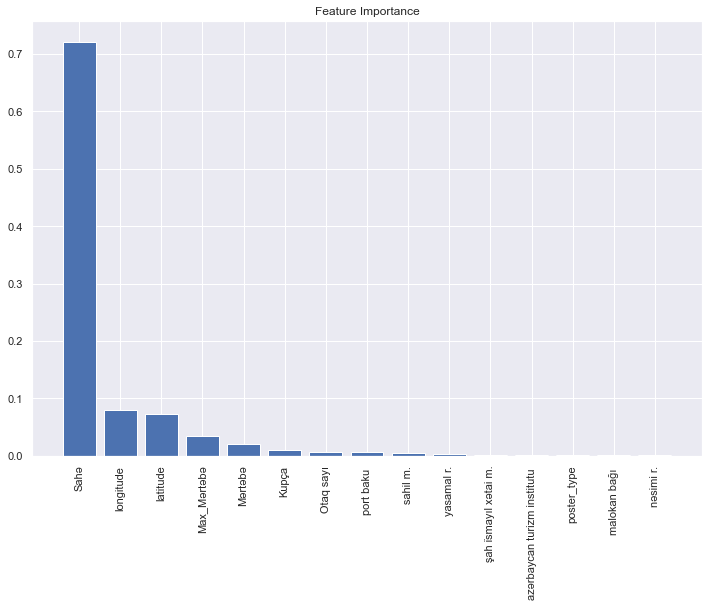

In [185]:
importance = rand_forest.feature_importances_

ziped_val =  dict(zip(X.columns,importance))

ziped_val = dict(sorted(ziped_val.items(), key=lambda x: x[1], reverse = True) )



plt.bar( list(ziped_val.keys())[:15] , list(ziped_val.values())[:15]   )
plt.xticks(rotation=90)
plt.title( "Feature Importance" )
plt.show()

## Random Forest Model Info

In [99]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [100]:
model = rand_forest

tresh_y = y_test[ y_test > 500000 ]
tresh_x_test = X_test.loc[ tresh_y.index ]


rmse_tr = float(format(np.sqrt(metrics.mean_squared_error( (tresh_y) , ( model.predict( tresh_x_test  ) ) )),'.3f'))
rmse = float(format(np.sqrt(metrics.mean_squared_error( (y_test) , ( model.predict( X_test  ) ) )),'.3f'))
r_squared_test = float(format(r2_score(  (y_test) , (model.predict( X_test ))  ), ".3f") ) 
r_squared_train = float(format(r2_score(  (y_train) , (model.predict( X_train ))  ), ".3f") ) 

adj_r_squared_test = float(format(adjustedR2( r_squared_test , X_test.shape[0], X_test.shape[1]  ),'.3f'))
adj_r_squared_train = float(format(adjustedR2( r_squared_train , X_train.shape[0], X_train.shape[1]  ),'.3f'))

cv = float(format(cross_val_score( model , X ,  y ,cv=5).mean(),'.3f')) #np.log1p( X[to_log] ) 

print( "Root mean squared error(tresh) : ", rmse_tr )
print( "Root mean squared error : ", rmse )
print( "R-squared(test): ", r_squared_test )
print( "R-squared(train): ", r_squared_train )
print( "Adjusted R-squared(test)", adj_r_squared_test  )
print( "Adjusted R-squared(train)", adj_r_squared_train  )
print( "5-Fold Cross Validation: ", cv )


Root mean squared error(tresh) :  143730.13
Root mean squared error :  42824.721
R-squared(test):  0.887
R-squared(train):  0.958
Adjusted R-squared(test) 0.885
Adjusted R-squared(train) 0.958
5-Fold Cross Validation:  0.876


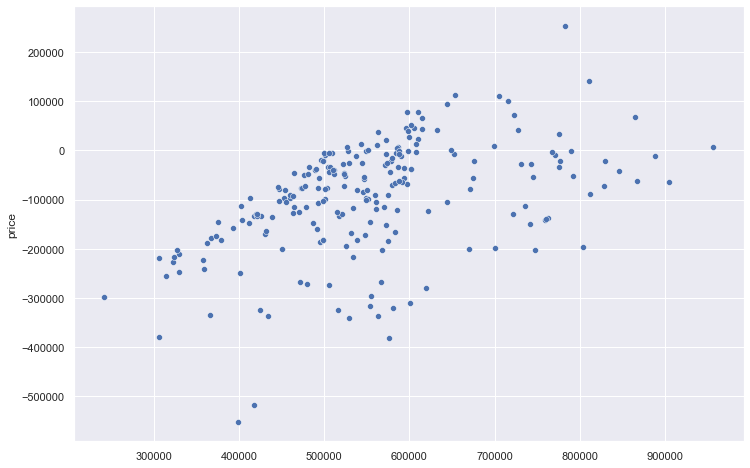

In [47]:
x_pred = ( rand_forest.predict( tresh_x_test ) ).round()
y_pred = ( tresh_y )

residual = x_pred - y_pred

sns.scatterplot(  x = x_pred  , y= residual  )  

plt.ticklabel_format( useOffset=False ,style='plain', axis = "both" )

## Implementing simple linear regression without FE

In [150]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit( X_train , y_train )
reg.score( X_test , y_test) 

0.7826424841885049

In [129]:
#johnson_inverse(y_test.iloc[0:10].values, g, et, ep, l)
np.exp( y_test.iloc[0:5].values )

<ipython-input-129-9d14994ceb12>:2: RuntimeWarning: overflow encountered in exp
  np.exp( y_test.iloc[0:5].values )


array([inf, inf, inf, inf, inf])

In [164]:
#johnson_inverse(reg.predict( X_test.iloc[0:10].values ), g, et, ep, l).round()
np.exp( reg.predict( X_test.iloc[0:5].values ) ).round()

array([115679.,  88369., 123671., 102124., 146467.])

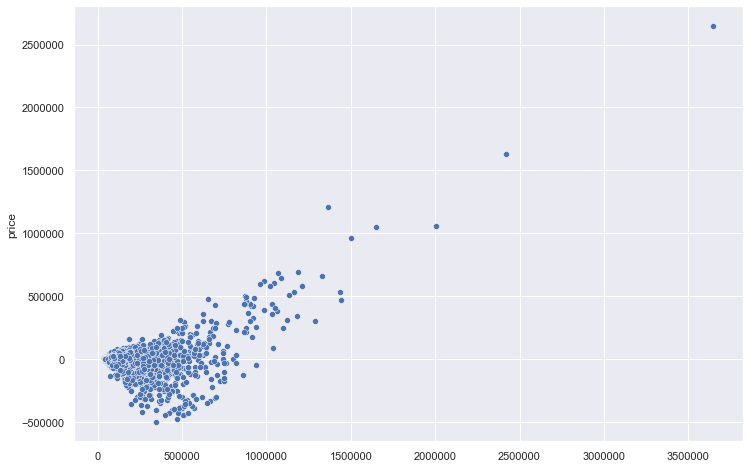

In [165]:

#x_pred = johnson_inverse(  reg.predict( X_test.values )   , g, et, ep, l).round()
#y_pred = johnson_inverse(   y_test.values    , g, et, ep, l).round()

x_pred = np.exp( reg.predict( X_test ) ).round()
y_pred = np.exp( y_test )

residual = x_pred - y_pred

sns.scatterplot(  x = x_pred  , y= residual  )  

plt.ticklabel_format( useOffset=False ,style='plain', axis = "both" )
    

## Linear Regression with normal log

In [130]:
from sklearn.linear_model import LinearRegression
to_log = ["Sahə","longitude","latitude",        "Max_Mərtəbə","Mərtəbə","Otaq sayı"  ]


X_train[to_log] = np.log1p(X_train[to_log])
#y_train =  np.log1p(y_train)
X_test[to_log] = np.log1p(X_test[to_log])
#y_test = np.log1p(y_test)

reg = LinearRegression().fit( X_train, y_train )  
reg.score( X_test, y_test )

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0.7095542374843675

In [167]:

#johnson_inverse(  reg.predict( X_test.iloc[0:5].values )   , g, et, ep, l).round()
np.exp( reg.predict( X_test.iloc[0:5].values )  )


array([117477.02359949,  84109.31954457, 123578.30993196,  77537.45405062,
       155435.39631283])

In [168]:
#johnson_inverse(   y_test.iloc[0:5].values    , g, et, ep, l).round()
np.exp(  y_test.iloc[0:5].values )

array([138001.,  75001., 150001.,  70001., 185001.])

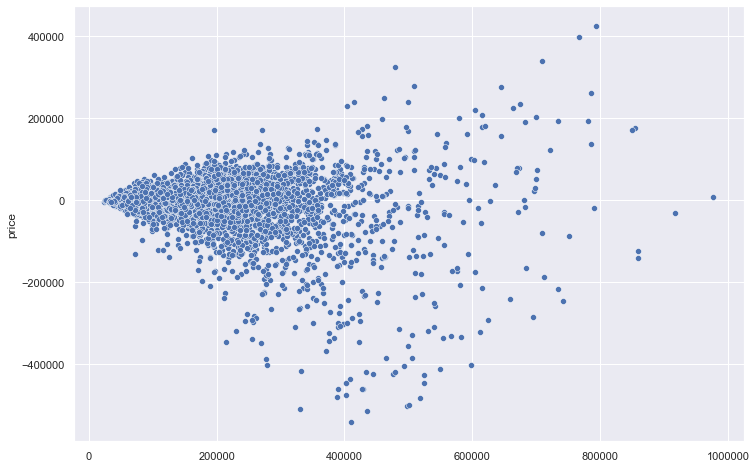

In [169]:
#x_pred = johnson_inverse(  reg.predict( X_test.values )   , g, et, ep, l).round()
#y_pred = johnson_inverse(   y_test.values    , g, et, ep, l).round()
x_pred = np.exp( reg.predict( X_test ) ).round()
y_pred = np.exp( y_test )

residual = x_pred - y_pred

sns.scatterplot(  x = x_pred  , y= residual  )  

plt.ticklabel_format( useOffset=False ,style='plain', axis = "both" )

## Lasso

In [170]:
from sklearn.linear_model import  Lasso, Ridge

ridge = Ridge( alpha=5 )  # Ridge works bad. alpha =1 means simple linear regression

ridge.fit(  X_train , y_train )
ridge.score( X_test , y_test )


0.8593462971595236

## Cross-validated Lasso 

In [171]:
from sklearn.linear_model import LassoLarsCV,RidgeCV


ridge_cv = RidgeCV(  cv = 10   )

ridge_cv.fit(  X_train , y_train )

ridge_cv.score( X_test , y_test )



0.8595442687662473

In [172]:
#johnson_inverse(  lasso_cv.predict( X_test.iloc[0:5].values )   , g, et, ep, l).round()
np.exp(ridge.predict( X_test.iloc[:10].values )).round()

array([117096.,  83430., 126250.,  77038., 155390., 181755., 303171.,
       101238., 110841., 126331.])

In [173]:
#johnson_inverse(   y_test.iloc[:10].values    , g, et, ep, l).round()
np.exp( y_test.iloc[:10].values )

array([138001.,  75001., 150001.,  70001., 185001., 171601., 480001.,
       112001., 153001., 140001.])

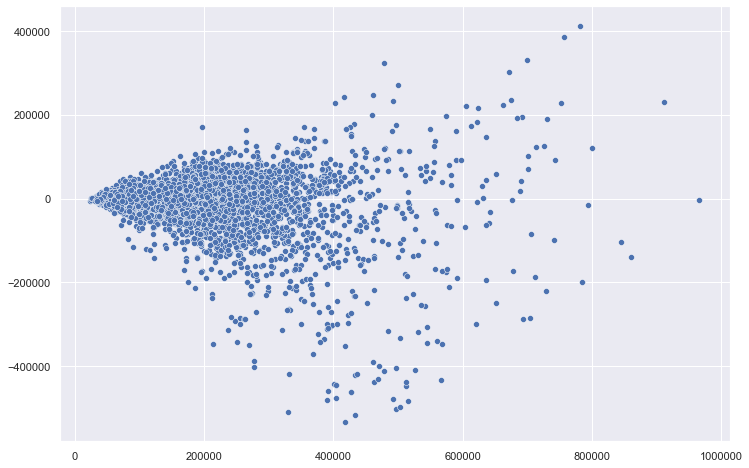

In [174]:
x_pred = np.exp( ridge.predict( X_test.values ) ).round()
y_pred = np.exp( y_test.values )

#x_pred = johnson_inverse(  lasso_cv.predict( X_test.values )   , g, et, ep, l).round()
#y_pred = johnson_inverse(   y_test.values    , g, et, ep, l).round()

residual = x_pred - y_pred

sns.scatterplot(  x = x_pred  , y= residual  )  

plt.ticklabel_format( useOffset=False ,style='plain', axis = "both" )
#plt.xlim(0,1000000  )

In [175]:
X_test

,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,longitude,latitude,Max_Mərtəbə,1-ci mikrorayon q.,2-ci mikrorayon q.,20 yanvar m.,28 may m.,3-cü mikrorayon q.,4-cü mikrorayon q.,5-ci mikrorayon q.,6-cı mikrorayon q.,7-ci mikrorayon q.,8-ci kilometr q.,8-ci mikrorayon q.,9-cu mikrorayon q.,abşeron r.,avtovağzal m.,axundov bağı,ayna sultanova heykəli,azadlıq meydanı,azadlıq prospekti m.,azərbaycan dillər universiteti,azərbaycan kinoteatrı,azərbaycan turizm institutu,ağ şəhər,badamdar q.,bakmil m.,bakı asiya universiteti,bakı dövlət universiteti,bakı musiqi akademiyası,bakı slavyan universiteti,bakıxanov q.,bayıl q.,beşmərtəbə,biləcəri q.,binəqədi q.,binəqədi r.,botanika bağı,böyükşor q.,cavanşir körpüsü,dostluq kinoteatrı,dövlət i̇darəçilik akademiyası,dövlət statistika komitəsi,dərnəgül m.,elmlər akademiyası m.,fontanlar bağı,gənclik m.,hüseyn cavid parkı,həzi aslanov m.,həzi aslanov q.,i̇dman kompleksi,i̇ncəsənət və mədəniyyət un.,i̇nşaatçılar m.,i̇qsadiyyat universiteti,i̇zmir parkı,i̇çəri şəhər m.,koala parkı,kubinka q.,köhnə günəşli q.,m.hüseynzadə parkı,m.ə.rəsulzadə q.,m.ə.sabir parkı,malokan bağı,masazır q.,memar əcəmi m.,memarlıq və i̇nşaat universiteti,milli konservatoriya,montin bazarı,mərkəzi univermaq,neapol dairəsi,neft akademiyası,neftçi bazası,neftçilər m.,nizami kinoteatrı,nizami m.,nizami r.,nəriman nərimanov m.,nəriman nərimanov parkı,nərimanov heykəli,nərimanov r.,nəsimi bazarı,nəsimi m.,nəsimi r.,park zorge,pedaqoji universiteti,port baku,prezident parkı,qara qarayev m.,qaradağ r.,qaraçuxur q.,qubernator parkı,qış parkı,respublika stadionu,rusiya səfirliyi,rəssamlıq akademiyası,sabunçu r.,sahil bağı,sahil m.,sevil qazıyeva parkı,sirk,sovetski,space tv,sumqayıt,suraxanı r.,səbail r.,səməd vurğun parkı,texniki universiteti,tibb universiteti,tqdk,təhsil nazirliyi,ukrayna dairəsi,xalqlar dostluğu m.,xalça muzeyi,xırdalan,xətai r.,yasamal bazarı,yasamal q.,yasamal r.,yeni günəşli q.,yeni yasamal q.,zabitlər parkı,zoopark,zərifə əliyeva adına park,şah i̇smayıl xətai m.,şəlalə parkı,şərq bazarı,əhmədli m.,əhmədli q.,sumqayit,xirdalan
5576,1,1.945910,4.442651,1.098612,0,3.723577,3.928185,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10272,0,2.639057,4.174387,1.098612,1,3.722952,3.927643,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
18537,1,2.397895,4.262680,1.098612,1,3.722794,3.929047,2.890372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10919,1,1.098612,3.761200,0.693147,1,3.722773,3.927983,2.302585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10430,1,2.995732,4.615121,1.098612,1,3.723121,3.928512,3.091042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Model Info

In [178]:


model = ridge_cv


rmse = float(format(np.sqrt(metrics.mean_squared_error( np.exp(y_test) , np.exp( model.predict( X_test  ) ) )),'.3f'))
r_squared_test = float(format(r2_score(  np.exp(y_test) , np.exp(model.predict( X_test ))  ), ".3f") ) 
r_squared_train = float(format(r2_score(  np.exp(y_train) , np.exp(model.predict( X_train ))  ), ".3f") ) 

adj_r_squared_test = float(format(adjustedR2( r_squared_test , X_test.shape[0], X_test.shape[1]  ),'.3f'))
adj_r_squared_train = float(format(adjustedR2( r_squared_train , X_train.shape[0], X_train.shape[1]  ),'.3f'))

cv = float(format(cross_val_score( model , X ,  y ,cv=5).mean(),'.3f')) #np.log1p( X[to_log] ) 

print( "Root mean squared error : ", rmse )
print( "R-squared(test): ", r_squared_test )
print( "R-squared(train): ", r_squared_train )
print( "Adjusted R-squared(test)", adj_r_squared_test  )
print( "Adjusted R-squared(train)", adj_r_squared_train  )
print( "5-Fold Cross Validation: ", cv )


Root mean squared error :  62652.522
R-squared(test):  0.773
R-squared(train):  0.765
Adjusted R-squared(test) 0.768
Adjusted R-squared(train) 0.763
5-Fold Cross Validation:  0.834


## Save Model

In [45]:
import joblib

joblib.dump(rand_forest, "bina_model.joblib")

location_vectorizer.tokenizer = None
joblib.dump(location_vectorizer,"bina_voc_model.joblib")

['bina_voc_model.joblib']